In [1]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/museum_train.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [31]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

In [3]:
indoor_train_path = '/content/museum_train/indoor'
outdoor_train_path = '/content/museum_train/outdoor'

In [4]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        img = img.resize((64, 64))  # Resize images to a common size
        img = img.convert('L')  # Convert to grayscale (optional)
        img = np.array(img).flatten()  # Flatten the image to 1D array
        img = img/255
        images.append(img)
        labels.append(label)
    return images, labels

In [5]:
indoor_train_images, indoor_train_labels = load_images_from_folder(indoor_train_path, label=0)
outdoor_train_images, outdoor_train_labels = load_images_from_folder(outdoor_train_path, label=1)

In [6]:
X = np.array(indoor_train_images + outdoor_train_images)
y = np.array(indoor_train_labels + outdoor_train_labels)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model_1 = RandomForestClassifier(n_jobs=10,
                               max_depth=10,
                               n_estimators=200,
                               verbose=1,
                               random_state=42)
model_1.fit(X_train,y_train)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    7.2s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   40.6s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:   44.8s finished


RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=10,
                       random_state=42, verbose=1)

Accuracy: 76.85%
Precision: 76.33%
Recall: 77.02%
F1 Score: 76.68%


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:    0.1s finished


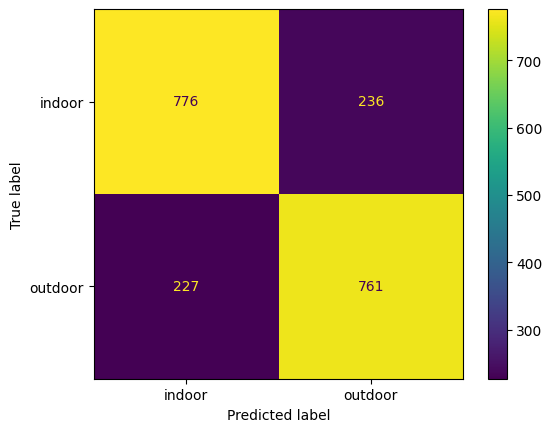

In [11]:
y_pred = model_1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1_score * 100:.2f}%')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['indoor','outdoor'])

In [12]:
def load_single_images(image):
    img = Image.open(image)
    img = img.resize((64, 64))
    img = img.convert('L')
    img = np.array(img).flatten()
    img = img/255
    return img

In [13]:
my_img = load_single_images('/content/test_image_2.jpg')

In [14]:
model_1.predict(my_img.reshape(1,-1))

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:    0.2s finished


array([1])

In [20]:
model_2 = RandomForestClassifier(n_jobs=10,
                               max_depth=10,
                               n_estimators=200,
                               verbose=1,
                               random_state=42,
                               max_features='sqrt')
model_2.fit(X_train,y_train)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   13.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:  1.3min finished


RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=10,
                       random_state=42, verbose=1)

Accuracy: 76.85%
Precision: 76.33%
Recall: 77.02%
F1 Score: 76.68%


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:    0.1s finished


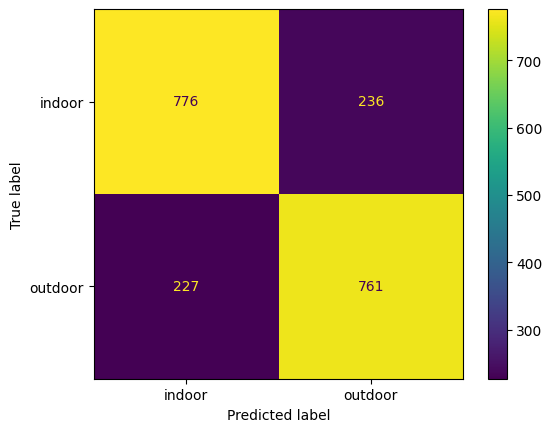

In [29]:
y_pred = model_2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1_score * 100:.2f}%')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['indoor','outdoor'])

In [24]:
my_img = load_single_images('/content/test_image_2.jpg')

In [25]:
model_2.predict(my_img.reshape(1,-1))

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:    0.1s finished


array([1])

In [26]:
model_3 = RandomForestClassifier(n_jobs=10,
                               max_depth=10,
                               n_estimators=200,
                               verbose=1,
                               random_state=42,
                               max_features='sqrt',
                               warm_start=True,
                               criterion='entropy')
model_3.fit(X_train,y_train)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    8.3s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   45.7s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:   49.5s finished


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       n_jobs=10, random_state=42, verbose=1, warm_start=True)

Accuracy: 76.75%
Precision: 75.97%
Recall: 77.43%
F1 Score: 76.69%


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:    0.1s finished


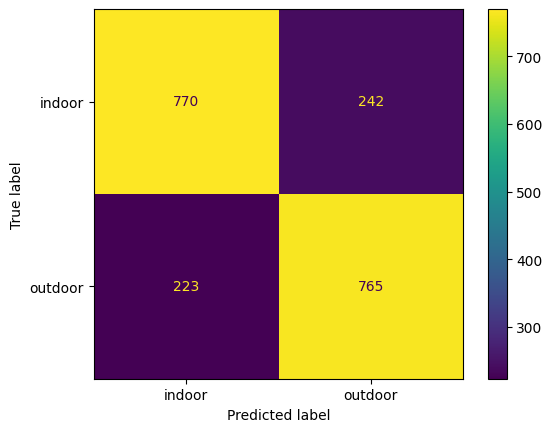

In [32]:
y_pred = model_3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1_score * 100:.2f}%')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['indoor','outdoor'])

In [33]:
my_img = load_single_images('/content/test_image_2.jpg')

In [35]:
model_3.predict(my_img.reshape(1,-1))

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:    0.0s finished


array([1])